In [30]:
#The target variable is whether the frame is a commercial or not
#Dataset can be found:
#http://archive.ics.uci.edu/ml/datasets/tv+news+channel+commercial+detection+dataset#

In [31]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data=pd.read_csv(
  r'D:\data_storage\Projects\ml_commercial_detection\parsed_data\BBC.csv',
  delimiter=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17720 entries, 0 to 17719
Columns: 232 entries, index to 4125
dtypes: float64(228), int64(4)
memory usage: 31.4 MB


In [33]:
data.head(10)

,index,target,qid,2,3,4,5,6,7,8,...,924,959,1002,1016,1028,1048,1112,1119,4124,4125
0,123,1,0,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,...,0.008475,0.036017,0.006356,0.008475,0.0,0.002119,0.000000,0.0,0.422334,0.663918
1,124,1,0,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,...,0.109244,0.117647,0.006303,0.000000,0.0,0.008403,0.000000,0.0,0.332664,0.766184
2,109,1,0,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,...,0.074519,0.062500,0.004808,0.000000,0.0,0.009615,0.000000,0.0,0.346674,0.225022
3,86,1,0,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,...,0.061728,0.046296,0.012346,0.000000,0.0,0.012346,0.003086,0.0,0.993323,0.840083
4,76,1,0,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,...,0.000000,0.000000,0.003521,0.000000,0.0,0.045775,0.007042,0.0,0.341520,0.710470
5,63,1,0,1.729633,0.493336,4.814710,1.349464,0.016101,0.011201,0.127927,...,0.004310,0.017241,0.034483,0.000000,0.0,0.012931,0.000000,0.0,0.126540,0.453794
6,37,1,0,0.488582,0.646101,9.193557,13.368759,0.013238,0.010493,0.134122,...,0.000000,0.007812,0.031250,0.000000,0.0,0.039062,0.023438,0.0,0.014125,0.780474
7,28,1,0,1.912773,1.238620,12.591994,16.522797,0.010965,0.007385,0.143415,...,0.000000,0.000000,0.010870,0.043478,0.0,0.000000,0.000000,0.0,0.879272,0.100582
8,90,1,0,4.446828,3.007744,13.681284,8.180489,0.015537,0.011874,0.127431,...,0.005882,0.014706,0.000000,0.000000,0.0,0.105882,0.014706,0.0,0.802862,0.607239
9,39,1,0,9.082875,3.979809,18.950127,7.487096,0.015338,0.011326,0.167949,...,0.000000,0.000000,0.000000,0.044118,0.0,0.036765,0.007353,0.0,0.860766,0.795669


In [34]:
data.shape

(17720, 232)

In [35]:
#Column with name 123 to 2123 are bag words, we will not use them
cols=cols=list(range(2,18))
cols=[str(x) for x in cols]
cols.append('4124')
cols.append('4125')
cols.insert(0,'target')

data=data[cols]
data.head(5)

,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,4124,4125
0,1,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,3808.067871,702.992493,7533.133301,1390.499268,971.098511,1894.978027,114.965019,45.018257,0.422334,0.663918
1,1,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,904.122925,7580.040039,1391.858643,724.249573,1722.364502,110.605591,47.206207,0.332664,0.766184
2,1,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,745.916321,7490.365723,1466.404785,1430.728149,2264.551025,139.833878,51.343670,0.346674,0.225022
3,1,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,840.047485,7411.335938,1639.901367,1154.446777,1610.234619,144.305328,50.244751,0.993323,0.840083
4,1,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,892.398682,7297.695801,1726.300415,1548.101074,1549.001587,131.560104,50.382572,0.341520,0.710470


In [36]:
#Let's give the columns their names
data.rename(columns={
 '2':'motion_distribution_mean',
 '3':'motion_distribution_variance',
 '4':'frame_difference_distribution_mean',
 '5':'frame_difference_distribution_variance',
 '6':'short_time_energy_mean',
 '7':'short_time_energy_variance',
 '8':'zcr_mean',
 '9':'zcr_variance',
 '10':'spectral_centroid_mean',
 '11':'spectral_centroid_variance',
 '12':'spectral_roll_off_mean',
 '13':'spectral_roll_off_variance',
 '14':'spectral_flux_mean',
 '15':'spectral_flux_variance',
 '16':'fundamental_frequency_mean',
 '17':'fundamental_frequency_variance',
 '4124':'edge_change_ratio_mean',
 '4125':'edge_change_ratio_variance'
},inplace=True)


In [37]:
data.head(5)

,target,motion_distribution_mean,motion_distribution_variance,frame_difference_distribution_mean,frame_difference_distribution_variance,short_time_energy_mean,short_time_energy_variance,zcr_mean,zcr_variance,spectral_centroid_mean,spectral_centroid_variance,spectral_roll_off_mean,spectral_roll_off_variance,spectral_flux_mean,spectral_flux_variance,fundamental_frequency_mean,fundamental_frequency_variance,edge_change_ratio_mean,edge_change_ratio_variance
0,1,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,3808.067871,702.992493,7533.133301,1390.499268,971.098511,1894.978027,114.965019,45.018257,0.422334,0.663918
1,1,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,904.122925,7580.040039,1391.858643,724.249573,1722.364502,110.605591,47.206207,0.332664,0.766184
2,1,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,745.916321,7490.365723,1466.404785,1430.728149,2264.551025,139.833878,51.343670,0.346674,0.225022
3,1,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,840.047485,7411.335938,1639.901367,1154.446777,1610.234619,144.305328,50.244751,0.993323,0.840083
4,1,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,892.398682,7297.695801,1726.300415,1548.101074,1549.001587,131.560104,50.382572,0.341520,0.710470


In [38]:
sum=data.isnull().sum()
pd.DataFrame({'count':sum,'%':sum*100/data.shape[0]})

,count,%
target,0,0.0
motion_distribution_mean,0,0.0
motion_distribution_variance,0,0.0
frame_difference_distribution_mean,0,0.0
frame_difference_distribution_variance,0,0.0
short_time_energy_mean,0,0.0
short_time_energy_variance,0,0.0
zcr_mean,0,0.0
zcr_variance,0,0.0
spectral_centroid_mean,0,0.0


In [39]:
#Perfect, no data to remove

In [40]:
#Let's normalize and scale the data
from sklearn.preprocessing import minmax_scale, normalize
for col in data.drop(columns=['target']):
  data[col]=normalize([np.array(data[col])])[0]
  data[col]=minmax_scale(data[col])

In [41]:
data.head(5)

,target,motion_distribution_mean,motion_distribution_variance,frame_difference_distribution_mean,frame_difference_distribution_variance,short_time_energy_mean,short_time_energy_variance,zcr_mean,zcr_variance,spectral_centroid_mean,spectral_centroid_variance,spectral_roll_off_mean,spectral_roll_off_variance,spectral_flux_mean,spectral_flux_variance,fundamental_frequency_mean,fundamental_frequency_variance,edge_change_ratio_mean,edge_change_ratio_variance
0,1,0.060724,0.052718,0.083315,0.084338,0.374862,0.500981,0.232525,0.222193,0.957332,0.408908,0.961992,0.476063,0.165367,0.287384,0.591631,0.560836,0.422382,0.663964
1,1,0.044562,0.019002,0.060140,0.050334,0.236197,0.536515,0.191367,0.288162,0.871404,0.525898,0.967982,0.476529,0.123332,0.261206,0.569197,0.588094,0.332696,0.766250
2,1,0.093887,0.019879,0.141953,0.091546,0.430271,0.667445,0.238775,0.196909,0.954850,0.433875,0.956531,0.502051,0.243637,0.343431,0.719611,0.639638,0.346708,0.224987
3,1,0.147884,0.027344,0.149998,0.042480,0.395513,0.515456,0.233283,0.191504,0.945678,0.488628,0.946438,0.561451,0.196589,0.244201,0.742622,0.625948,0.993480,0.840163
4,1,0.144648,0.031170,0.153792,0.041816,0.592448,0.563177,0.273774,0.230285,0.951404,0.519079,0.931926,0.591031,0.263624,0.234914,0.677033,0.627665,0.341553,0.710526


In [42]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
  #if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
  #  columnNames = columnNames[:10]
  ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
  corrs = df.corr().values
  for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate(
      'r=%.3f' % corrs[i, j], (0.8, 0.2), 
      xycoords='axes fraction', ha='right', 
      va='center', size=textSize
    )
  plt.suptitle('Scatter and Density Plot')
  plt.show()

In [43]:
#plotScatterMatrix(data,60,20)

In [44]:
x=data.drop(['target'],axis=1)
y=data['target']

In [49]:
from sklearn.feature_selection import mutual_info_classif
def get_importance(x,y):
  imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
  imp.columns=['Importance']
  return imp.sort_values(by='Importance',ascending=False)
get_importance(x,y)

,Importance
short_time_energy_variance,0.178612
spectral_flux_variance,0.158541
spectral_roll_off_variance,0.114891
spectral_centroid_variance,0.102261
spectral_roll_off_mean,0.095185
spectral_centroid_mean,0.084832
spectral_flux_mean,0.078140
fundamental_frequency_variance,0.057882
fundamental_frequency_mean,0.054652
short_time_energy_mean,0.053319


As we could have told from the distributions, the edge change ratio is useless.
Let's keep it then drop it and see what happens.

In [46]:
#Let's try to see what kind of results we can get 
#from a random forest classifier and then we'll see if
#we can improve it by transforming the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier().fit(x_train,y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred=m.predict(x_test))

0.8060948081264109

In [47]:
#Let's look at it's performance on the training data
accuracy_score(y_train,y_pred=m.predict(x_train))

1.0

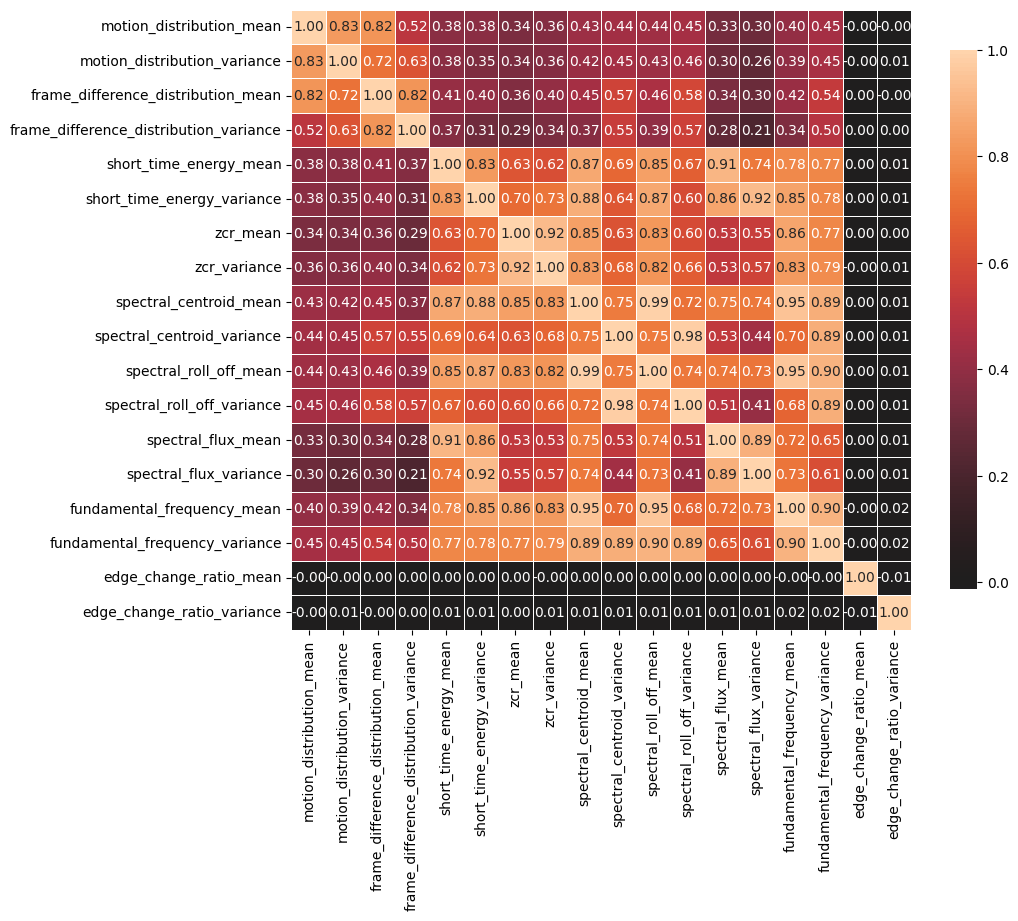

In [48]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(x)

In [82]:
print([x for x in range(10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [91]:
c_df=x.corr()

top_corr=[]
for i in range(c_df.shape[0]):
    for ii in range(c_df.shape[1]):
      if i>ii:
        if abs(data.iloc[i,ii]) >=0.80:
           top_corr.insert((i,ii))
           #print(c_df.index[i])
           #print(c_df.columns[ii])
           #print(c_df.iloc[i,ii])
top_corr.sort(reverse=True)
top_corr

TypeError: insert expected 2 arguments, got 1

In [50]:
from sklearn.decomposition import PCA

In [104]:
pca_object=PCA(n_components=8)
pca=pca_object.fit_transform(x)
x2=pd.DataFrame(data=pca)
get_importance(x2,y)

,Importance
6,0.080834
2,0.056061
4,0.050342
1,0.045061
5,0.036193
0,0.032729
7,0.027237
3,0.003880


In [105]:
pca_object.explained_variance_ratio_

array([0.67544469, 0.08074995, 0.08031171, 0.07804469, 0.02531147,
       0.02022013, 0.01243917, 0.00705615])

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.25,random_state=42)
m=RandomForestClassifier().fit(x_train,y_train)
accuracy_score(y_test,y_pred=m.predict(x_test))

0.7769751693002257

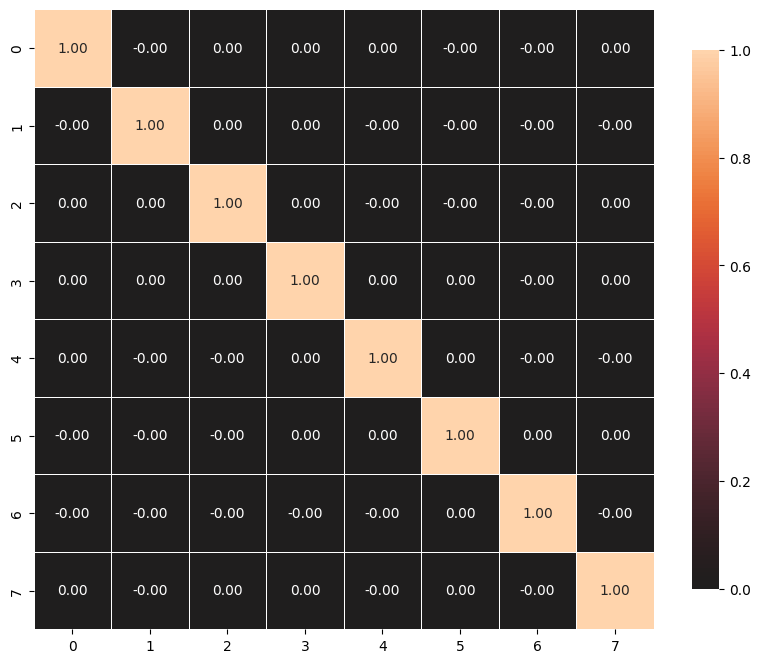

In [107]:
correlation_heatmap(x2)